# KNN no `chb13_com_dwt`

Explorando 20 rodadas de classificação com `KNN` em sua configuração padrão com o dataframe extraído com DWT para encontrar canal com melhor desempenho.

Por fim salvando a tabela com médias, desvios padrão e medianas do desempenho de cada canal.

## Importando bibliotecas

In [1]:
import numpy as np
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

seed_array = np.load('./../20_seeds.npy')
print(f'seeds: {seed_array}')

seeds: [4382 8968 8442 1729  290  490 2128 1167 8900 5078 1359  894 7809 6990
 3623 5906 1687 7080 5473 7854]


## 20 rodadas

In [2]:
chb_DF = pd.read_csv('./chb13_com_dwt.csv')
target_S = chb_DF.pop('target')

accuracy_DF = pd.DataFrame()

# agrupa todas colunas pelo mesmo número do canal
colunas_agrupadas_por_numero = []
for i in range(18):
    colunas_agrupadas_por_numero.append(
        [column for column in chb_DF.columns if f'{i}' in column.split('-')]
    )

for numero_da_coluna, colunas in enumerate(colunas_agrupadas_por_numero):
    X, y = chb_DF[colunas].values, target_S.values

    acc = []   

    for seed in seed_array:
        # Distribuindo os dados
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)
        
        # Instanciando e treinando classificador
        model = KNeighborsClassifier().fit(X_train, y_train)

        # Adicionando resultados às respectivas listas
        acc.append(model.score(X_test, y_test))

    accuracy_DF[f'{numero_da_coluna}'] = acc

accuracy_DF

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.832258,0.896774,0.851613,0.812903,0.806452,0.935484,0.690323,0.735484,0.825806,0.748387,0.651613,0.774194,0.780645,0.838710,0.812903,0.825806,0.812903,0.664516
1,0.929032,0.903226,0.858065,0.883871,0.825806,0.903226,0.735484,0.800000,0.819355,0.774194,0.580645,0.819355,0.787097,0.883871,0.800000,0.870968,0.819355,0.612903
2,0.877419,0.890323,0.890323,0.845161,0.819355,0.922581,0.709677,0.774194,0.851613,0.780645,0.683871,0.838710,0.845161,0.819355,0.832258,0.838710,0.812903,0.709677
3,0.851613,0.883871,0.858065,0.832258,0.851613,0.903226,0.696774,0.838710,0.832258,0.793548,0.677419,0.851613,0.845161,0.838710,0.832258,0.870968,0.774194,0.645161
4,0.864516,0.903226,0.858065,0.838710,0.845161,0.909677,0.722581,0.806452,0.864516,0.819355,0.677419,0.845161,0.825806,0.851613,0.832258,0.832258,0.800000,0.593548
5,0.845161,0.870968,0.870968,0.825806,0.806452,0.922581,0.625806,0.735484,0.825806,0.774194,0.625806,0.780645,0.812903,0.838710,0.806452,0.825806,0.812903,0.703226
6,0.877419,0.870968,0.870968,0.800000,0.858065,0.909677,0.696774,0.793548,0.812903,0.748387,0.658065,0.806452,0.767742,0.890323,0.812903,0.858065,0.819355,0.580645
7,0.896774,0.890323,0.858065,0.832258,0.825806,0.909677,0.709677,0.735484,0.870968,0.819355,0.709677,0.806452,0.832258,0.870968,0.832258,0.845161,0.806452,0.638710
8,0.890323,0.883871,0.851613,0.819355,0.819355,0.903226,0.619355,0.748387,0.819355,0.767742,0.632258,0.767742,0.774194,0.870968,0.825806,0.787097,0.812903,0.670968
9,0.903226,0.883871,0.864516,0.793548,0.851613,0.961290,0.593548,0.793548,0.870968,0.767742,0.664516,0.780645,0.787097,0.851613,0.851613,0.870968,0.851613,0.670968


,count,mean,std,min,25%,50%,75%,max
5,20.0,0.920000,0.016535,0.896774,0.908065,0.922581,0.929032,0.961290
1,20.0,0.889677,0.018356,0.851613,0.877419,0.890323,0.898387,0.929032
0,20.0,0.878710,0.022891,0.832258,0.862903,0.883871,0.890323,0.929032
2,20.0,0.858710,0.016732,0.825806,0.851613,0.858065,0.870968,0.890323
13,20.0,0.855161,0.023353,0.819355,0.838710,0.848387,0.874194,0.896774
15,20.0,0.841613,0.027964,0.787097,0.825806,0.838710,0.870968,0.883871
8,20.0,0.841290,0.024625,0.793548,0.819355,0.841935,0.864516,0.877419
4,20.0,0.837097,0.029220,0.793548,0.817742,0.835484,0.853226,0.896774
14,20.0,0.825161,0.023205,0.780645,0.806452,0.832258,0.845161,0.864516
3,20.0,0.820968,0.027838,0.754839,0.809677,0.822581,0.833871,0.883871


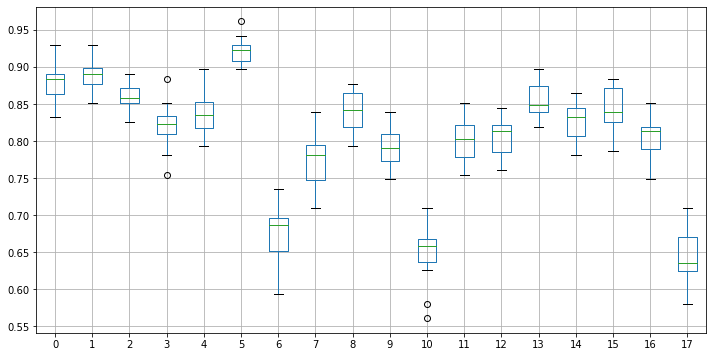

In [3]:
accuracy_DF.boxplot(figsize=(12, 6))
accuracy_DF.describe().transpose().sort_values(by='mean', ascending=False)

## Salvando rank em arquivo csv

In [4]:
save_DF = accuracy_DF.describe().transpose()[['mean', 'std', '50%']]
save_DF['chb'] = '13'
save_DF['channel'] = save_DF.index

save_DF.to_csv(path_or_buf='./knn_descr_channel_rank.csv', index=False)
save_DF

,mean,std,50%,chb,channel
0,0.878710,0.022891,0.883871,13,0
1,0.889677,0.018356,0.890323,13,1
2,0.858710,0.016732,0.858065,13,2
3,0.820968,0.027838,0.822581,13,3
4,0.837097,0.029220,0.835484,13,4
5,0.920000,0.016535,0.922581,13,5
6,0.675806,0.037143,0.687097,13,6
7,0.777097,0.033061,0.780645,13,7
8,0.841290,0.024625,0.841935,13,8
9,0.789355,0.027314,0.790323,13,9
